# Prediction of Diebetics patients - applied Machine Learning Approach

In [ ]:
Author: Sorya Ek

It is estimated that around 450 million people has diabetes world wide by last year. Diabetes atleast doubles a person's risk of early death. Approximately 5 million deaths each year resulted from diabetes only. There are early symptoms of untreated diabetes which are generally ignored and leads to the more severe damage when diagnosed. It is also indeed to detect this disease as soon as possible. In order to build such a system, first an intelligent modelneeds to be developed which can identify patterns from the historical data and can predict the chances of having diabete disease on the basis of few medical parameters which are available from thegeneral test results.

In this report we have investigated and explored the historical data of diabetes patients. The relationship among paramters are explored and visualised. Finally several predictive models are fitted as best tuning parameters are identified.

Dataset is available at https://www.kaggle.com/uciml/pima-indians-diabetes-database. Predictors are Number of Pregnancies Number, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age, while Outcome is the dependent variable. This is the supervised two-class classification problem. We have selected sklearn package for model fitting.

We have applied the following approach:

* Data Exploration and discriptive analysis.
* Model fitting using SVM linear, rbf, sigmoid classifier.
* Model fitting using Multilayer Perceptron Classifier.
* Finding optimal tuning parameters using cross validation.

# Preprocessing and Visualisations.

Initially data is loaded and empty rows are removed. We are visualising relationship between important variables at the original scale. However, we will normalize the numeric data when fittingthe model. There are 768 records in the dataset.

Purpose of the visualisation is to identify relation among pair of predictors and also to identify the importance of each predictors which would be useful in building predictive model.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")
data = data.dropna()
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [47]:
y = data["Outcome"]

group_labels = ['No', 'Yes']

data_no = data[data['Outcome'] == 0]
data_yes = data[data['Outcome'] == 1]

glucose_no = data_no["Glucose"]
glucose_yes = data_yes["Glucose"]

BloodPressure_no = data_no['BloodPressure']
BloodPressure_yes = data_yes['BloodPressure']

Exploring relationship between glucose and blood pressure. 

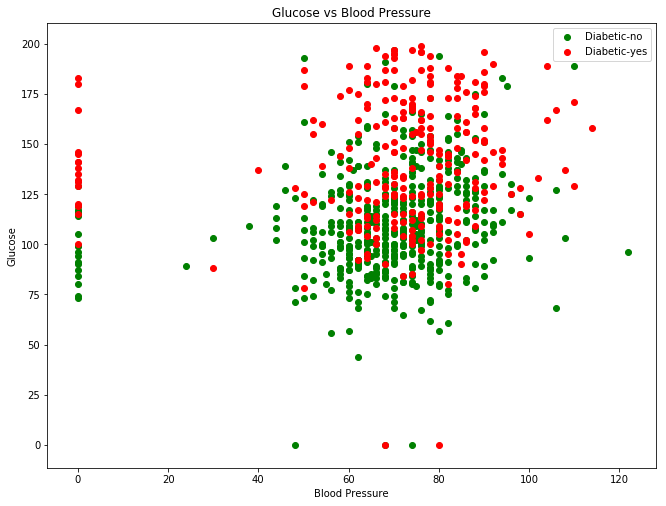

In [48]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(221)

ax.scatter(x=BloodPressure_no, y=glucose_no, c='g', label="Diabetic-no")
ax.scatter(x=BloodPressure_yes, y=glucose_yes, c='r', label="Diabetic-yes")
plt.title("Glucose vs Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Glucose")
ax.legend()

From the above pattern, it is clear that higher blood pressure and higher glucose level have higher chances that patient is suffering from diabetic disease. There are many overlapping datapoints which are difficult to separate using linear classifier. 

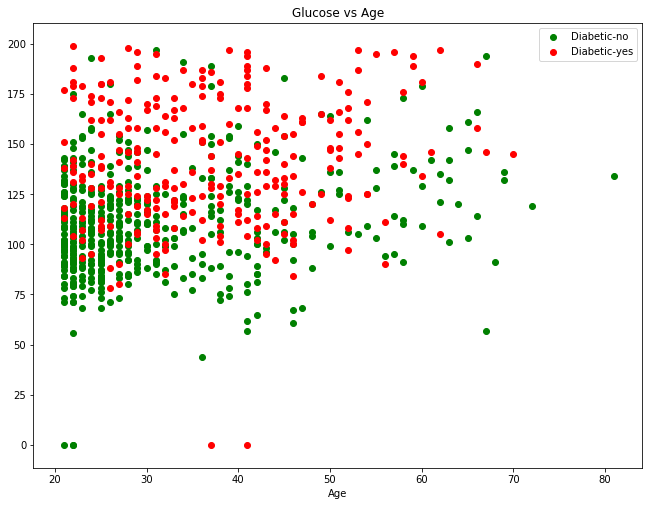

In [49]:
age_no = data_no['Age']
age_yes = data_yes['Age']

fig = plt.figure(figsize=(24, 18))
ax2 = plt.subplot(222)
ax2.scatter(x=age_no, y=glucose_no, c='g', label="Diabetic-no")
ax2.scatter(x=age_yes, y=glucose_yes, c='r', label="Diabetic-yes")
ax2.legend()
plt.title("Glucose vs Age")
plt.xlabel("Age")

We are interested to know if age has an impact on glucose level, other way around if older people have higher glucose level. However, from the above plot it can be seen that glucose level is high across all age levels. Hence, it is difficult to say that if age has an impact on glucose leve.

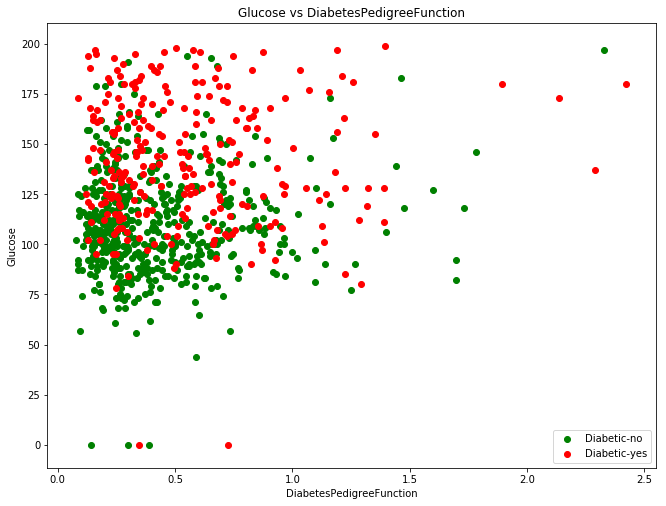

In [50]:
d_no = np.array(data_no['DiabetesPedigreeFunction'])
d_yes = np.array(data_yes['DiabetesPedigreeFunction'])
fig = plt.figure(figsize=(24, 18))
ax2 = plt.subplot(223)
ax2.scatter(x=d_no, y=glucose_no, c='g', label="Diabetic-no")
ax2.scatter(x=d_yes, y=glucose_yes, c='r', label="Diabetic-yes")
ax2.legend()
plt.ylabel("Glucose")
plt.title("Glucose vs DiabetesPedigreeFunction")
plt.xlabel("DiabetesPedigreeFunction")

As DiabetesPedigreeFunction increasing glucose level isn't increasing or decreasing significantly. It doesn't have significant linear relationship.

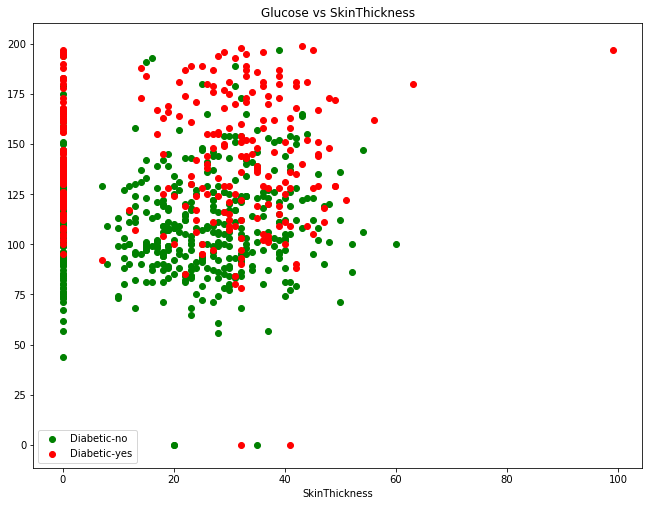

In [51]:
d_no = data_no['SkinThickness']
d_yes = data_yes['SkinThickness']
fig = plt.figure(figsize=(24, 18))
ax2 = plt.subplot(224)
ax2.scatter(x=d_no, y=glucose_no, c='g', label="Diabetic-no")
ax2.scatter(x=d_yes, y=glucose_yes, c='r', label="Diabetic-yes")
ax2.legend()
plt.title("Glucose vs SkinThickness")
plt.xlabel("SkinThickness")

plt.show()

There are two visible groups in the above data points. First one, is at skinthinness level 0, showing higher glucose level for diabetic patients while lower glucose level for non-diabetics. The other cluster shows level of glucose level increases a bit a skin thickness increases.

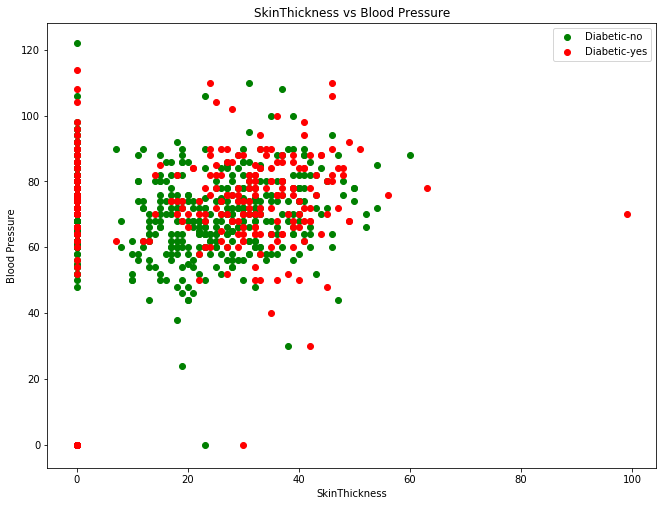

In [52]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(221)
d_no = data_no['SkinThickness']
d_yes = data_yes['SkinThickness']
ax.scatter(x=d_no, y=BloodPressure_no, c='g', label="Diabetic-no")
ax.scatter(x=d_yes, y=BloodPressure_yes, c='r', label="Diabetic-yes")
plt.title("SkinThickness vs Blood Pressure")
plt.xlabel("SkinThickness")
plt.ylabel("Blood Pressure")
ax.legend()

Skinthickness relation with blood pressure shows almost similar pattern as it shows with glucose. We have seen glucose and blood pressure as the important features and have higher correlation with each other.

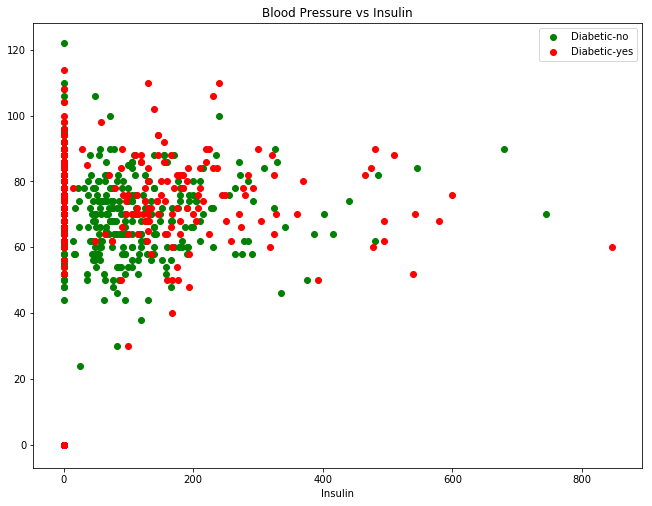

In [53]:
d_no = data_no['Insulin']
d_yes = data_yes['Insulin']
fig = plt.figure(figsize=(24, 18))
ax2 = plt.subplot(222)
ax2.scatter(x=d_no, y=BloodPressure_no, c='g', label="Diabetic-no")
ax2.scatter(x=d_yes, y=BloodPressure_yes, c='r', label="Diabetic-yes")
ax2.legend()
plt.title("Blood Pressure vs Insulin")
plt.xlabel("Insulin")

Insulin level from 10 to around 100 have less number of diabetics patients, as compared to higher level of insulin leads to higher diabetic patients. There are more patients if insulin level is close to 0. This patten is interesting and would add more information to the predictive model. 

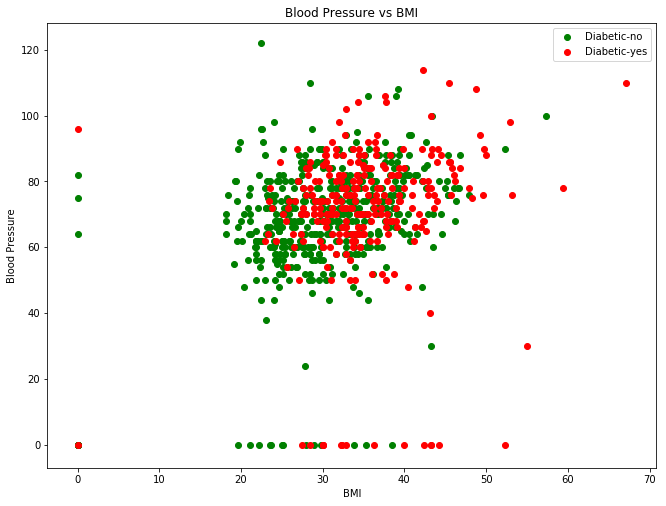

In [54]:
d_no = np.array(data_no['BMI'])
d_yes = np.array(data_yes['BMI'])
fig = plt.figure(figsize=(24, 18))
ax2 = plt.subplot(223)
ax2.scatter(x=d_no, y=BloodPressure_no, c='g', label="Diabetic-no")
ax2.scatter(x=d_yes, y=BloodPressure_yes, c='r', label="Diabetic-yes")
ax2.legend()
plt.ylabel("Blood Pressure")
plt.title("Blood Pressure vs BMI")
plt.xlabel("BMI")

Body mass index and blood pressure parameters exibits a slightly linear relationship. As BMI level increases and with the increase in the blood pressure leads to have higher number of diabetic patients.

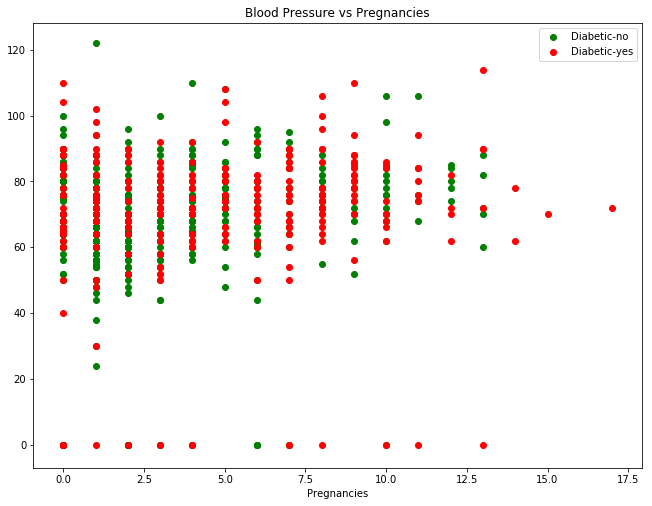

In [55]:
d_no = data_no['Pregnancies']
d_yes = data_yes['Pregnancies']
fig = plt.figure(figsize=(24, 18))
ax2 = plt.subplot(224)
ax2.scatter(x=d_no, y=BloodPressure_no, c='g', label="Diabetic-no")
ax2.scatter(x=d_yes, y=BloodPressure_yes, c='r', label="Diabetic-yes")
ax2.legend()
plt.title("Blood Pressure vs Pregnancies")
plt.xlabel("Pregnancies")
plt.show()

We have explored several paired relationship. The above relation shows relation of blood pressure with number of pregnancies. The blood pressure in the range of 60-100 have most diabetic patients in relation with the nubmer of pregnancies.

Till now we have explored the paired relationship among few important predictors. Now, we will explore distribution of few more specific predictors in relation with diabetic and non-diabetic patients.


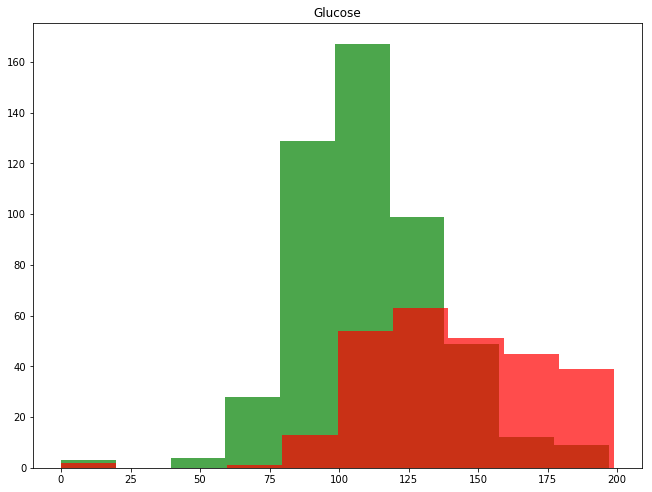

In [56]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(221)
ax.hist(glucose_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(glucose_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.title("Glucose")

Histogram shows bimodal distribution, it clearly shows there are two different peaks of the glucose distribtion for each diabetic and non-diabetic category.

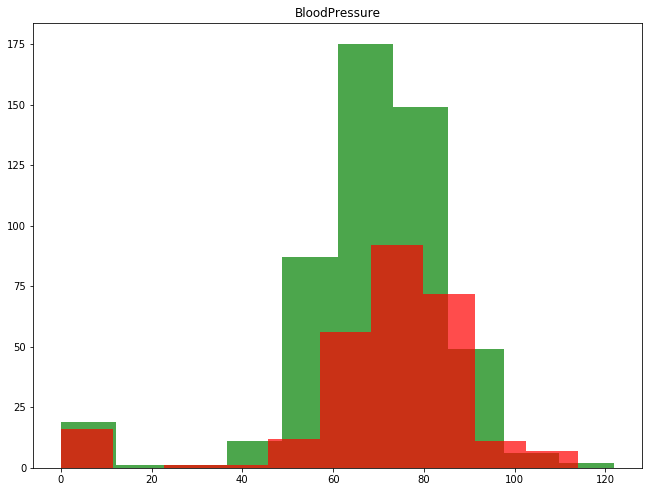

In [57]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(222)
ax.hist(BloodPressure_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(BloodPressure_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.title("BloodPressure")

Blodd pressure distrubtion for each category is almost overlapped.

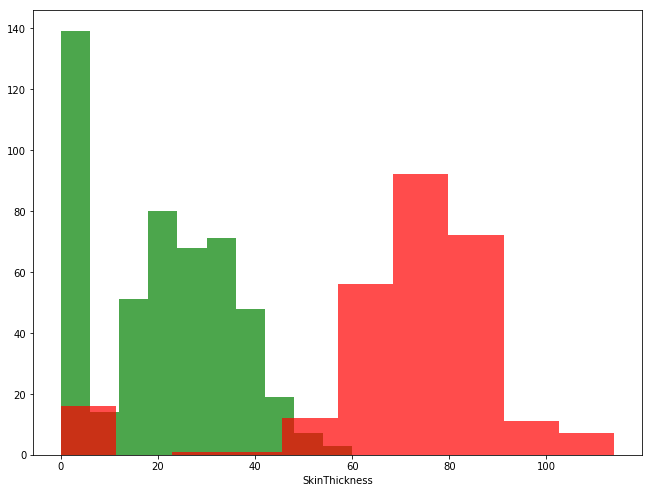

In [58]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(223)
SkinThickness_no = data_no['SkinThickness']
SkinThickness_yes = data_yes['SkinThickness']
ax.hist(SkinThickness_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(BloodPressure_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.xlabel("SkinThickness")

Skinthickness is clearly have two different distribution for diabetic and non-diabetic patients. It is a good predictor and would highly be useful. There are few data points we are at low level of skinthickness. Those points may be the outlier, and once removed or treated, it may become more separable.

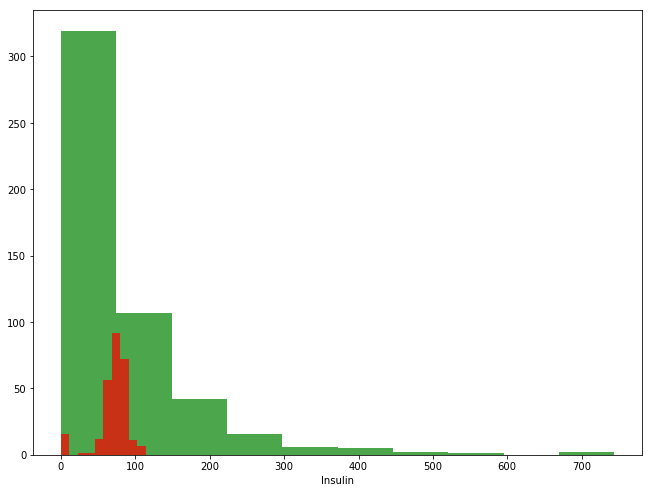

In [59]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(224)
SkinThickness_no = data_no['Insulin']
SkinThickness_yes = data_yes['Insulin']
ax.hist(SkinThickness_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(BloodPressure_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.xlabel("Insulin")
plt.show()

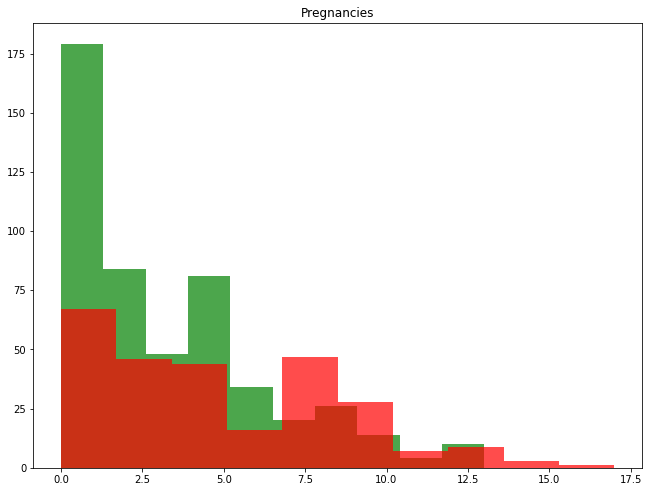

In [60]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(221)
d_no = data_no['Pregnancies']
d_yes = data_yes['Pregnancies']
ax.hist(d_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(d_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.title("Pregnancies")

Number of pregnancies distribution is righ-skewed distribution for both categories diabetic and non-diabetic, it is almost overlapped and does't seem to be separable.

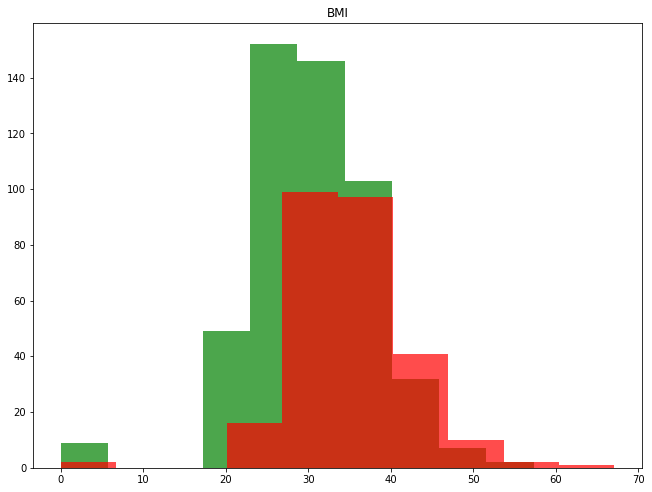

In [61]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(222)
d_no = data_no['BMI']
d_yes = data_yes['BMI']
ax.hist(d_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(d_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.title("BMI")

BMI level of less than 10 also shows few cases which have diabetic, it looks those are the children who might have got this disease inherited.

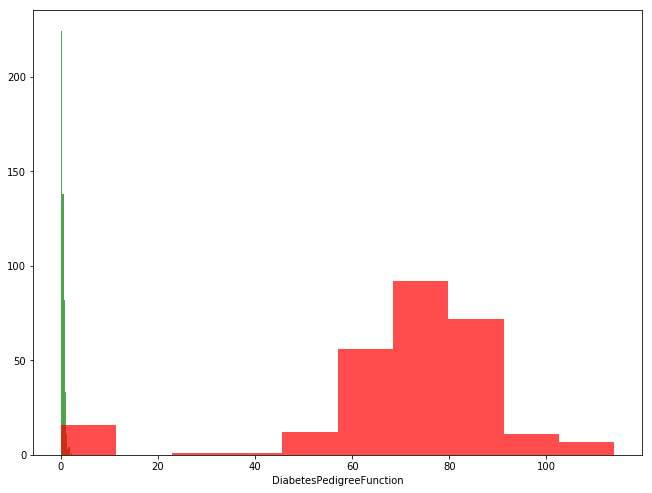

In [62]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(223)
SkinThickness_no = data_no['DiabetesPedigreeFunction']
SkinThickness_yes = data_yes['DiabetesPedigreeFunction']
ax.hist(SkinThickness_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(BloodPressure_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.xlabel("DiabetesPedigreeFunction")

Non-diabetic patients have almost 0 diabeticpedigree function, while diabetic patients have higher values of diabeticpedigree function. Distribution is almost normal.

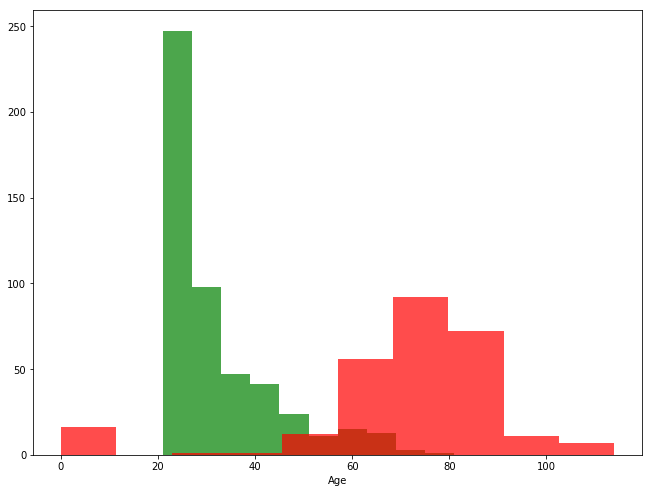

In [63]:
fig = plt.figure(figsize=(24, 18))
ax = plt.subplot(224)
SkinThickness_no = data_no['Age']
SkinThickness_yes = data_yes['Age']
ax.hist(SkinThickness_no, color='g', label = "Diabetic-no", alpha = 0.7)
ax.hist(BloodPressure_yes, color='r', label = "Diabetic-yes", alpha = 0.7)
plt.xlabel("Age")
plt.show()

Distribution of glucose is bimodel as two distributions are clearly visible for diabetic and non-diabetic patients. Similarly, sickness is also an important predictor. However, insulin, number of pregnancies are not showing bimodal relationship.

DiabetesPedigreeFunction and Age shows two peaks which shows two separate distributions which are useful in classificatio of diabetic patients.

In next section, we furture move forward towards building the model and evaulation each models
on the basis of performance. 

# Model fitting and Evaluation

Data exploration and visualisation shows non-linearity in the data. Linear model may not perform well, hence more shophisticated non-linear model make give better results. As it is a two-class classification problem, SVM with non-linear kernel and more complex Multilayer perceptron model are selected and compared.

With this assumption, we build SVM model with three different kernels involving linear, rbf and sigmoid and a multimodel perceptron classification model. All these models are compared based on accuracy and other metrices. 

SVM is the maximum margin classification algorithm. Linear kernel is linear classifier while other three kernel rbf and sigoid are non-linear classifier. The figure below shows the maximum-margin boundary which seprates two classes. Non-linear SVM are radian basis filter kernel, it converts the non-linearity to linearity and then find the maximum margin.

<img src="SVM_linear.png" width="300px" height="300px"> <img src="kernel.png" width="300px" height="300px">

Non-linear SVM kernel tranforms non-linearity of data to linearity is achieved by rfb and sigmoid function. It is generally achieved by adding additional dimension to incorporate linear separation in the classes.

Next we prepare data for model fitting. First, data is splitted into training and testing datasets. 33% data is used for testing purpose while remaining is used to fit the model.

In [64]:
import pandas as pd
from sklearn import svm, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
data = pd.read_csv("data.csv")
data = data.dropna()
y = data["Outcome"]
X = data.drop('Outcome', axis=1)
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("Accuracy SVM (Linear): ", round(accuracy_score(y_test, y_pred)*100, 2), "%")

[[136  32]
 [ 35  51]]
             precision    recall  f1-score   support

          0       0.80      0.81      0.80       168
          1       0.61      0.59      0.60        86

avg / total       0.73      0.74      0.74       254

0.736220472441
('Accuracy SVM (Linear): ', 73.62, '%')


SVM Linear model achieved 73.62% accuracy, 0.73 precision and 0.74 recall.

In [68]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy SVM (RBF): ", round(accuracy_score(y_test, y_pred)*100, 2), "%")

[[142  26]
 [ 36  50]]
             precision    recall  f1-score   support

          0       0.80      0.85      0.82       168
          1       0.66      0.58      0.62        86

avg / total       0.75      0.76      0.75       254

('Accuracy SVM (RBF): ', 75.59, '%')


SVM rbf kernel has improved the accuracy, it has achieved 75.59 accuracy, while precision and recall also got improved.

In [69]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy SVM (sigmoid): ", round(accuracy_score(y_test, y_pred)*100, 2), "%")

[[122  46]
 [ 41  45]]
             precision    recall  f1-score   support

          0       0.75      0.73      0.74       168
          1       0.49      0.52      0.51        86

avg / total       0.66      0.66      0.66       254

('Accuracy SVM (sigmoid): ', 65.75, '%')


Sigmoid function outperforms and gives the minimum accuracy of 65.75% accuracy with lowerst precision and recall.

Next we build and fit the multilayer perceptron (mlp) classifier. It is a feed forward artificial neural network algorithm. It uses supervised learning techique and uses backpropogation for training.


<img src="mpl.png" width="300px" height="300px"> 

It has input layers, hidden layers and output layers. Each layer provides input to the next layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function.

A perceptron is a linear classifier; that is, it is an algorithm that classifies input by separating two categories with a straight line. Input is typically a feature vector x multiplied by weights w and added to a bias b: y = w * x + b. A perceptron produces a single output based on several real-valued inputs by forming a linear combination using its input weights.

In [71]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(12,), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy MLPClassifier (lbfgs): ", round(accuracy_score(y_test, y_pred)*100, 2), "%")

[[132  36]
 [ 41  45]]
             precision    recall  f1-score   support

          0       0.76      0.79      0.77       168
          1       0.56      0.52      0.54        86

avg / total       0.69      0.70      0.69       254

('Accuracy MLPClassifier (lbfgs): ', 69.69, '%')


It gives around 69.69% accuracy, precision and recall using MLPClassifier. However, this is achieved on keeping the default parameters set, next we will tune for models for different possible values.

SVM parameters are tuned 

In [73]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(clf.best_params_)
print(clf.best_score_)
print("Accuracy SVM tuned: ", round(accuracy_score(y_test, y_pred)*100, 2), "%")

[[140  28]
 [ 37  49]]
             precision    recall  f1-score   support

          0       0.79      0.83      0.81       168
          1       0.64      0.57      0.60        86

avg / total       0.74      0.74      0.74       254

{'kernel': 'sigmoid', 'C': 25, 'gamma': 0.001}
0.778210116732
('Accuracy SVM tuned: ', 74.41, '%')


'kernel': 'sigmoid', 'C': 25, 'gamma': 0.001 are the best tuned parameter for SVM classifier.
It achieved 74.41% accuracy and 74% precision and recall.

In [75]:
tuned_parameters = {
    'hidden_layer_sizes': [(5,15,30, 50), (15,30, 50,), (10,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


clf = GridSearchCV(MLPClassifier(),
                   tuned_parameters,
                   cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(clf.best_params_)
print(clf.best_score_)
print("Accuracy MLPClassifier tuned: ", round(accuracy_score(y_test, y_pred)*100, 2), "%")

/anaconda/envs/GeoScience/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[133  35]
 [ 35  51]]
             precision    recall  f1-score   support

          0       0.79      0.79      0.79       168
          1       0.59      0.59      0.59        86

avg / total       0.72      0.72      0.72       254

{'alpha': 0.05, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (10,)}
0.780155642023
('Accuracy MLPClassifier tuned: ', 72.44, '%')


Finally, we have performed cross validation to find the best tuning paramters of MLPClassifier. Several combination of 
hidden_layer_sizes, activation function, solver, alpha and learning rate are used to determine the optimal paramters.

Tuned paramters are:
'alpha': 0.05, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'constant'

It achieved 72% accuracy and 72% precision and recall. 

SVM classifier with rbf kernel is found to be the best among all models in terms of accuracy, precision and recall. It achieved around 75% accuracy.

## Conclusion

We have practised many classification algorithms and setting right paramters are inportant to achieve quality results.
We have been able to train, tune and evaluate each models. Along with accuracy, recall and precision are used to select the best model. However, we have achieved 75% accuracy, there is still a scope of improving  the model and enhance the accuracy. More features can be introduced to make the model better. The current purpose of the project is to build a simple non-linear model using differet SVM kernel and multilayer perceptron layer classifier. From the results SVM with radial basis performed better. 